## Live plot of Nvidia GPU utilization 

Inspired by [Jimmie Goode](http://jimgoo.com/buffered-gens/)

In [31]:
%matplotlib inline

import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from collections import OrderedDict
import psutil
import threading



from pynvml import (nvmlInit,
                     nvmlDeviceGetCount, 
                     nvmlDeviceGetHandleByIndex, 
                     nvmlDeviceGetUtilizationRates,
                     nvmlDeviceGetName)

In [15]:
def gpu_info():
    "Returns a tuple of (GPU ID, GPU Description, GPU % Utilization)"
    nvmlInit()
    deviceCount = nvmlDeviceGetCount()
    info = []
    for i in range(0, deviceCount): 
        handle = nvmlDeviceGetHandleByIndex(i) 
        util = nvmlDeviceGetUtilizationRates(handle)
        desc = nvmlDeviceGetName(handle) 
        info.append((i, desc, util.gpu)) #['GPU %i - %s' % (i, desc)] = util.gpu
    return info

In [56]:
utils = []

class SysMonitor(threading.Thread):
    shutdown = False

    def __init__(self):
        threading.Thread.__init__(self)

    def run(self):
        utils = []
        while not self.shutdown:
            dt = datetime.datetime.now()
            util = gpu_info()
            cpu_percent = psutil.cpu_percent()
            utils.append([dt] + [x[2] for x in util] + [cpu_percent])
            time.sleep(.1)
            
    def stop(self):
        self.shutdown = True
        
    def plot(self):
        fig, ax = plt.subplots(1, 2, figsize=(15, 3))
        ax[0].title.set_text('GPU Utilization')
        ax[0].plot([u[1] for u in utils])
        ax[0].set_ylim([0, 100])
        ax[1].title.set_text('CPU Utilization')
        ax[1].plot([u[2] for u in utils])
        ax[1].set_ylim([0, 100])

In [57]:
t1 = SysMonitor()

In [58]:
t1.start()

In [69]:
t1.stop()

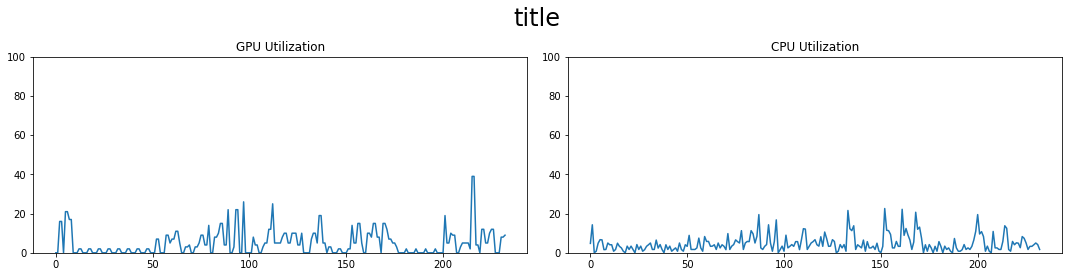

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('title', size=24)
ax[0].title.set_text('GPU Utilization')
ax[0].plot([u[1] for u in utils])
ax[0].set_ylim([0, 100])
ax[1].title.set_text('CPU Utilization')
ax[1].plot([u[2] for u in utils])
ax[1].set_ylim([0, 100])
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

In [46]:
t1.shutdown = True 

In [16]:
utils = []
while True:
    try:
        dt = datetime.datetime.now()
        util = gpu_info()
        cpu_percent = psutil.cpu_percent()
        utils.append([dt] + [x[2] for x in util] + [cpu_percent])
#         # Don't plot anything on the first pass
#         if len(utils) == 1:
#             continue
#         df = pd.DataFrame(utils, columns=['dt'] + 
#                           ['GPU %i - %s' % (x[0], x[1]) for x in util]).set_index('dt')
#         ax = df.plot();
#         vals = ax.get_yticks();
#         #ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
#         ax.set_ylabel('GPU Utilization');
#         ax.set_xlabel('Time');
#         ax.set_ylim([0, 100])
#         display.clear_output(wait=True)
#         display.display(plt.gcf())
        time.sleep(.1)
    except KeyboardInterrupt:
        break

(0, 100)

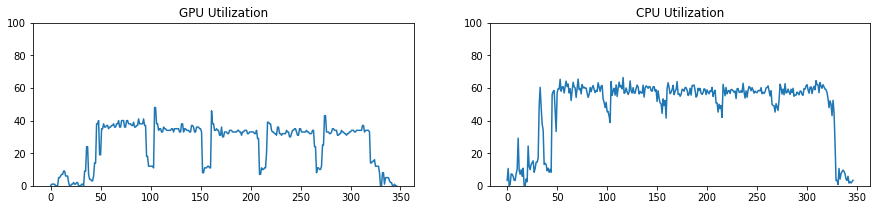

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax[0].title.set_text('GPU Utilization')
ax[0].plot([u[1] for u in utils])
ax[0].set_ylim([0, 100])
ax[1].title.set_text('CPU Utilization')
ax[1].plot([u[2] for u in utils])
ax[1].set_ylim([0, 100])

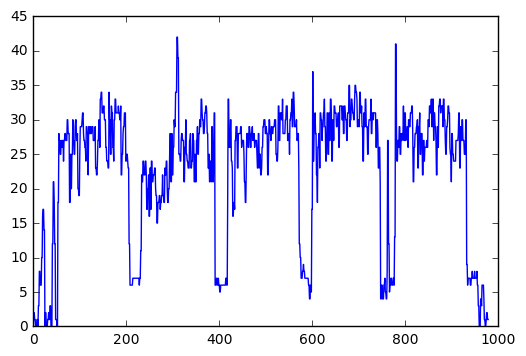

In [26]:
# single thread, 32 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 17s - loss: 1.1819 - acc: 0.5795 - val_loss: 1.0329 - val_acc: 0.6359
# CPU times: user 2min 44s, sys: 9.61 s, total: 2min 54s
# Wall time: 1min 32s
plt.plot([u[1] for u in utils])

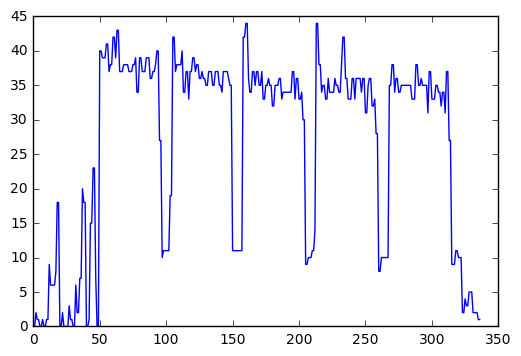

In [30]:
# multiprocessing 7 process, 128 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 5s - loss: 1.1685 - acc: 0.5837 - val_loss: 1.0572 - val_acc: 0.6308
# CPU times: user 43 s, sys: 4.88 s, total: 47.9 s
# Wall time: 29.6 s
plt.plot([u[1] for u in utils])

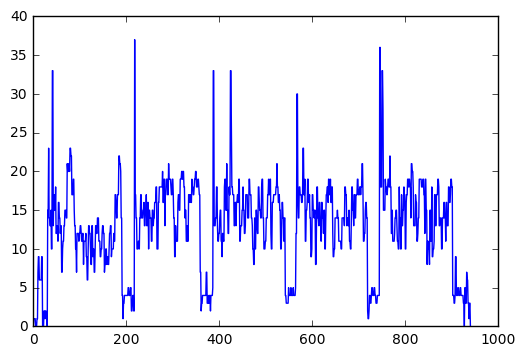

In [28]:
# single thread, 128 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 18s - loss: 1.1787 - acc: 0.5811 - val_loss: 1.1588 - val_acc: 0.5969
# CPU times: user 2min 1s, sys: 5.08 s, total: 2min 6s
# Wall time: 1min 30s
plt.plot([u[1] for u in utils])

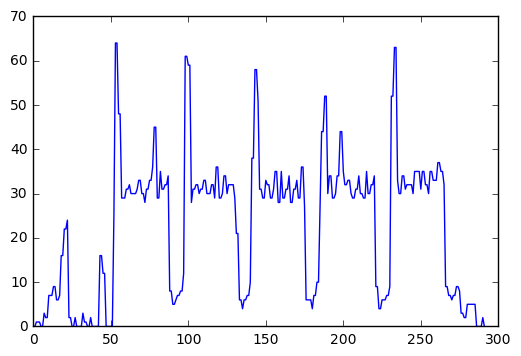

In [32]:
# multiprocessing 7 process, 512 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 4s - loss: 1.2569 - acc: 0.5482 - val_loss: 1.2016 - val_acc: 0.5716
# CPU times: user 27 s, sys: 3.15 s, total: 30.1 s
# Wall time: 24.5 s
plt.plot([u[1] for u in utils])

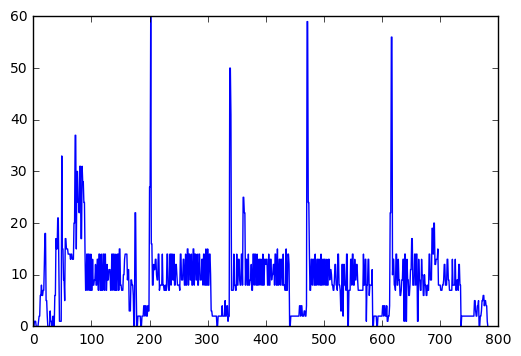

In [34]:
# single thread, 512 batch size
plt.plot([u[1] for u in utils])

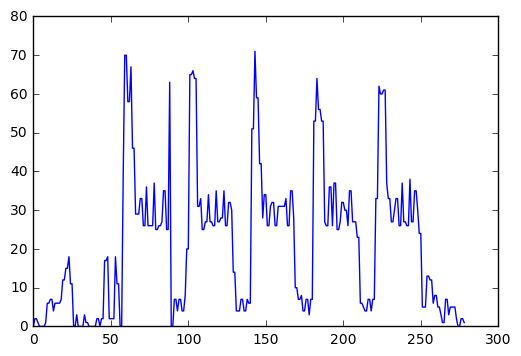

In [36]:
# multiprocessing 7 process, 1024 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 4s - loss: 1.2890 - acc: 0.5388 - val_loss: 1.7425 - val_acc: 0.4104
# CPU times: user 24.6 s, sys: 2.92 s, total: 27.5 s
# Wall time: 23 s
plt.plot([u[1] for u in utils])

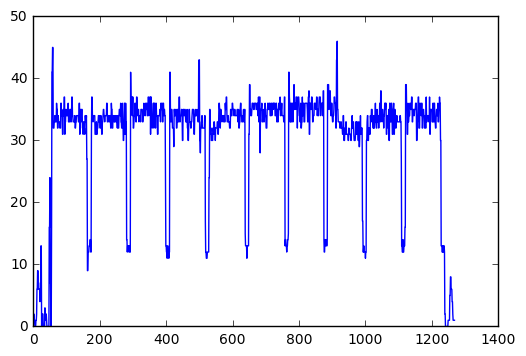

In [38]:
# Epoch 10/10
# 50000/50000 [==============================] - 11s - loss: 1.1219 - acc: 0.6071 - val_loss: 0.9875 - val_acc: 0.6562
# CPU times: user 3min 9s, sys: 18.7 s, total: 3min 28s
# Wall time: 2min
plt.plot([u[1] for u in utils])

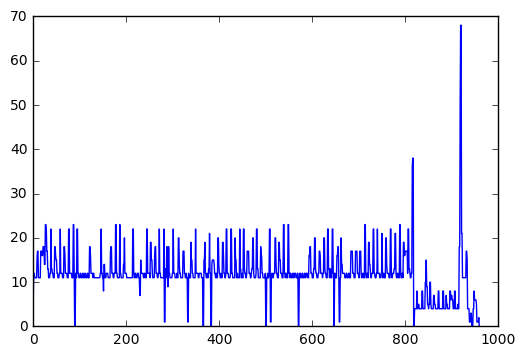

In [40]:
plt.plot([u[1] for u in utils])

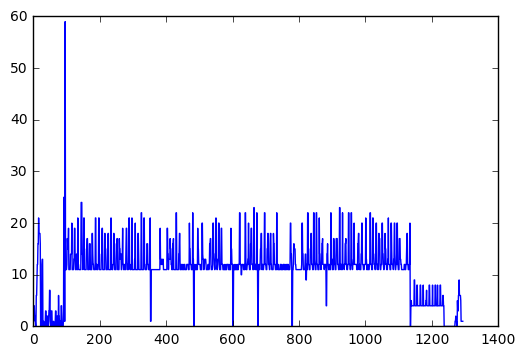

In [42]:
plt.plot([u[1] for u in utils])

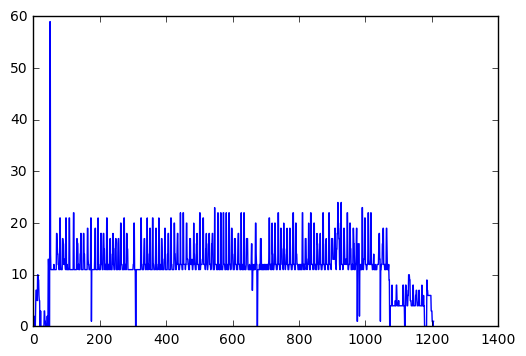

In [44]:
# cats dogs, single thread, 32 batch size
# Epoch 1/5
# 22778/22778 [==============================] - 116s - loss: 0.6286 - acc: 0.6419 - val_loss: 0.5760 - val_acc: 0.6967
plt.plot([u[1] for u in utils])

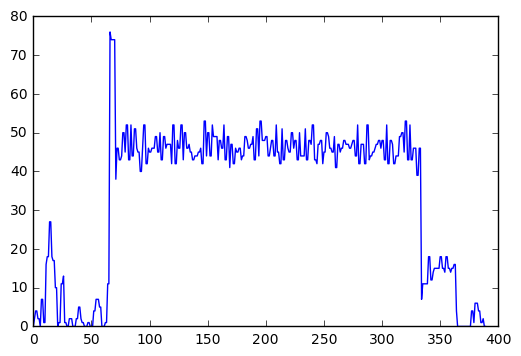

In [46]:
# cats dogs, 7 processes, 32 batch size
# Epoch 1/1
# 22778/22778 [==============================] - 31s - loss: 0.6384 - acc: 0.6369 - val_loss: 0.5697 - val_acc: 0.6967
plt.plot([u[1] for u in utils])

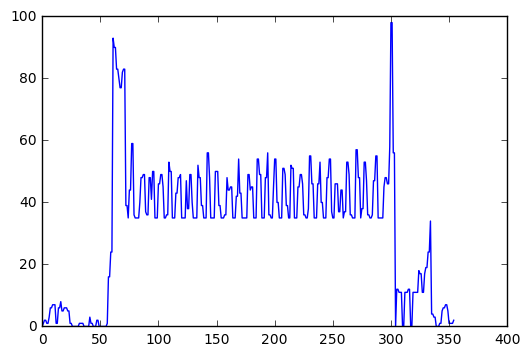

In [48]:
# cats dogs, 7 processes, 128 batch size
# Epoch 1/1
# 22778/22778 [==============================] - 28s - loss: 0.6779 - acc: 0.5761 - val_loss: 0.6040 - val_acc: 0.6931
plt.plot([u[1] for u in utils])

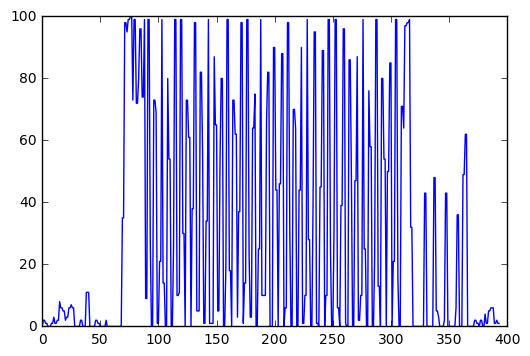

In [50]:
plt.plot([u[1] for u in utils])

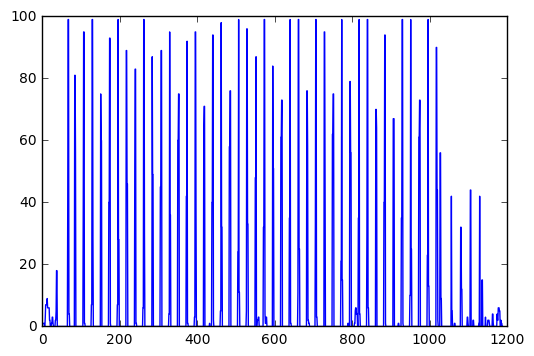

In [52]:
plt.plot([u[1] for u in utils])

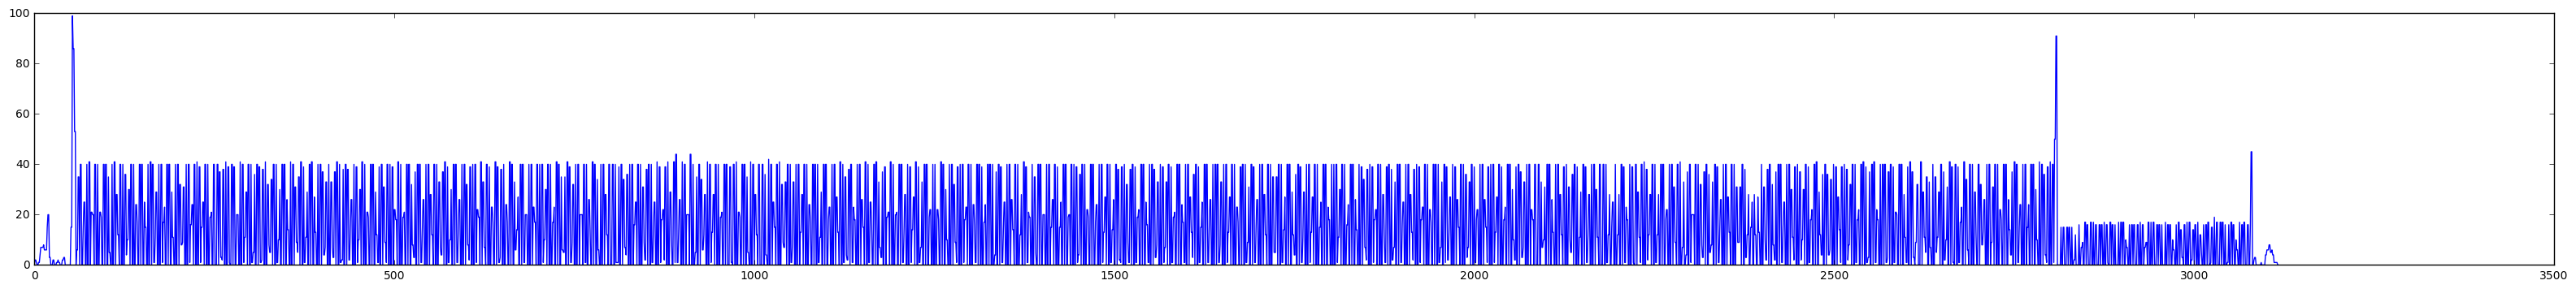

In [58]:
#single threaded
fig, ax = plt.subplots(1, 1, figsize=(40, 4))
ax.plot([u[1] for u in utils])

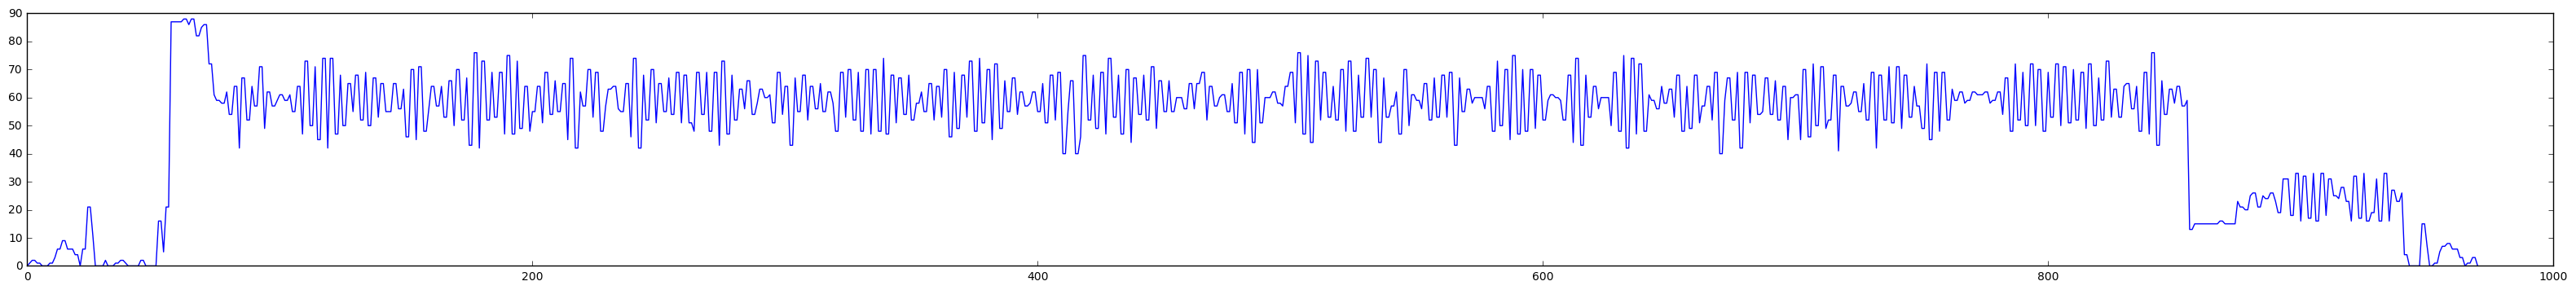

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(40, 4))
ax.plot([u[1] for u in utils])

In [ ]:
ax = df.plot();
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
ax.set_ylabel('GPU Utilization');
ax.set_xlabel('Time');